In [1]:
from pycolator import *
x = np.linspace(-4,4,100).tolist()
plt.subplot(2,2,1)
plt.plot(x, [i**2 for i in x])
plt.subplot(2,2,2)
plt.plot(x, [i**6 for i in x])
plt.subplot(2,1,2)
plt.plot(x, [i**4 for i in x])
plt.savefig('Test.png')
plt.savefig('Test2.png', dpi = 300)

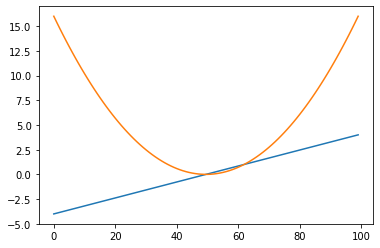

In [2]:
ls = [x, [i**2 for i in x]]
test = [[a,b] for a,b in zip(ls[0],ls[1])]
plt.plot(test)

In [3]:
test = []
test.append([1,2,3])
test.append([3,4,5])
test

[[1, 2, 3], [3, 4, 5]]

In [1]:
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../Data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol)

file read
strings converted to numbers
q-values estimated
ranks computed


In [5]:
p = percolator(dSlow, idCol, excluded, I = 2, plotEveryIter = True, plotSaveName = 'Test.png')

Training in iteration 1 with split 1/3 starts!
Training in iteration 1 with split 2/3 starts!
Training in iteration 1 with split 3/3 starts!
Iteration 1/2 done!
Training in iteration 2 with split 1/3 starts!
Training in iteration 2 with split 2/3 starts!
Training in iteration 2 with split 3/3 starts!
Iteration 2/2 done!


NameError: name 'xMax' is not defined

In [13]:
qColName = 'q-val'
rankColName = 'Rank'
xMax = 0.05
df = dSlow
#%time qVals1 = [df.loc[i, qColName] for i in df.index if (df.loc[i,qColName] <= xMax and df.loc[i, rankColName] == 1)]
%time qVals2 = df[(df[qColName] <= xMax) & (df[rankColName] == 1)][qColName]

Wall time: 3.96 ms


In [5]:
all(qVals1 == qVals2)

True

In [11]:
def f():
    t = [1.5,6,4,3,2,6,8,1,99]
    return t.sort()
f()